# Quality-Of-Wine-Consumption


A predictive model based on RandomForestClassifier to predict the quality of a wine whether it is bad or not

Context of the project

This datasets is related to red variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality.

I am working on the red wine data from my predictive analysis.

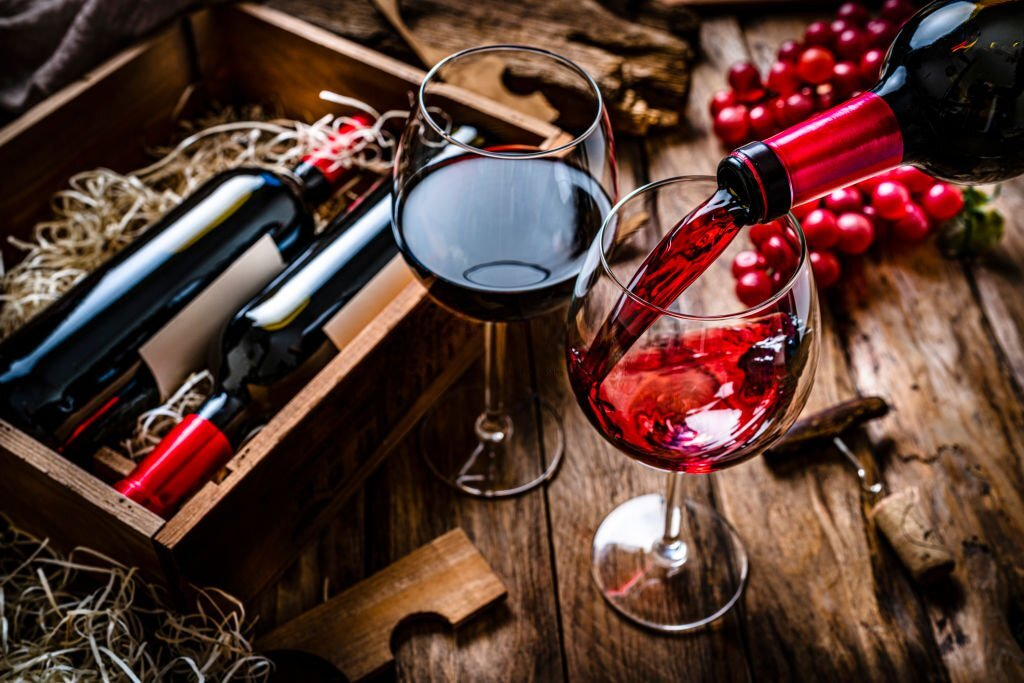

#### Import the necessary library to perform the operation


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#### Wrangle the data

In [3]:
def wrangle_data(filepath):
    df = pd.read_csv(filepath)
    
    # Get the columns name and assign it to the variable columns
    columns = [col.replace('"', '') for col in df.columns.str.split(";")[0]]
    
    # Split the data frame to fit each feature of the dataframe and also rename the features
    df = df[df.columns[0]].str.split(";", expand = True).astype(float)
    df.columns = columns
    
    
    return df

In [4]:
df = wrangle_data("data/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


#### Check for colinearity of the predictive variables and the label 


In [5]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


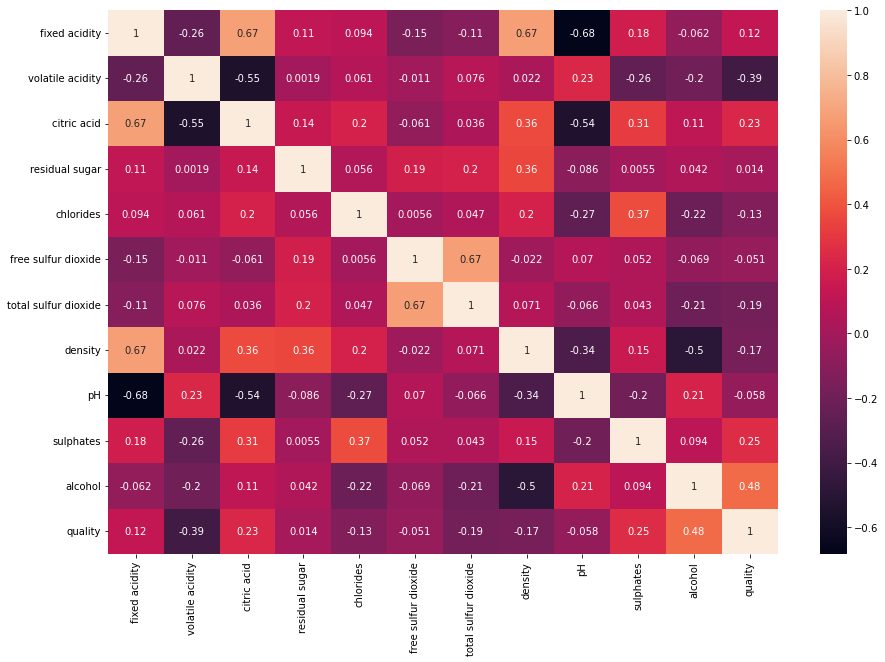

In [6]:
# Create the visualization to grasp what the above summary is all about
fig, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(df.corr(), annot= True);

#### Note for the Colinearity
To have a base overview of the dataset we can see that the feautures PH density, volatile acidity, chlorides and sulfur oxide contribute to the reduce in quality of the red wine.

Also as the volume of the alcohol, sulphate, citric acid increases the quality increases (of course people love things that has good taste especially the smell of ethanol).

#### Let's visualize the relationship of alcohol and citric acid to the quality

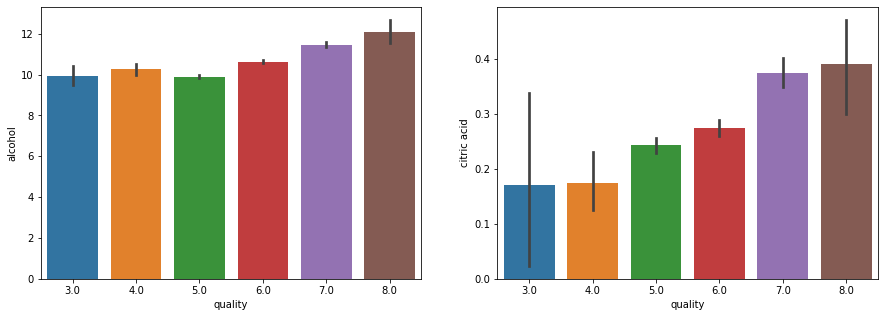

In [7]:
fig, (ax0, ax1) = plt.subplots(figsize = (15, 5), nrows =1, ncols = 2)
sns.barplot(x='quality', y='alcohol', data=df, ax=ax0)
sns.barplot(x='quality', y='citric acid', data=df, ax=ax1);

We can see that as the alcohol and citric acid increases the quality of the wine increases

#### Let's visualize the relationship between volatile acidity and the quality

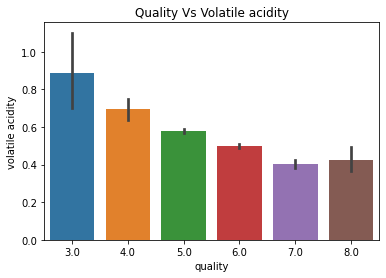

In [8]:
sns.barplot(x='quality', y='volatile acidity', data=df)
plt.title("Quality Vs Volatile acidity");

#### Interpretation of the above plot

We can see that as the volatile acidity increases the quality of the wine reduces. This makes sense because volatile acidity is the measure of acetic acid in a wine. As the volume increase it causes unpleasant taste to the wine

### Converting our label variable
Since we've been able to gain some insights from the let's turn our label into a binarization value (categorical varaible)

In [9]:
df["quality"] = (df["quality"] > 6).astype(int)

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


### Split the data sets

Performing vertical split

In [11]:
X = df.drop(columns = "quality")
y = df["quality"]

Horizontal spilt randomly

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Baseline Model

In [13]:
acc = y_train.value_counts(normalize =True).max()
print("The Accuracy score for the baseline model is ", round(acc, 2))

The Accuracy score for the baseline model is  0.87


## Model

In [14]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

## Evaluate the model

In [15]:
y_preds = clf.predict(X_test)

In [16]:
accuracy_score(y_test, y_preds)

0.9

Wow our model performed well when generalizing. Let's check the confusion matrix to be sure of how well it performed

In [17]:
pd.DataFrame(confusion_matrix(y_test, y_preds), index = ["T", "F"], columns = ["T", "F"])

,T,F
T,264,9
F,23,24


## Wow! Our model performed well

## Features Importances

Let's check the importance to know which attributes actually contributed to the quality of the wine

In [18]:
imp = pd.Series(clf.feature_importances_, index = X_train.columns).sort_values(ascending=False)
imp

alcohol                 0.175593
sulphates               0.126365
volatile acidity        0.114981
citric acid             0.088446
density                 0.082249
total sulfur dioxide    0.081685
fixed acidity           0.075123
chlorides               0.070765
residual sugar          0.063607
pH                      0.063424
free sulfur dioxide     0.057762
dtype: float64

### The visualization of the importances

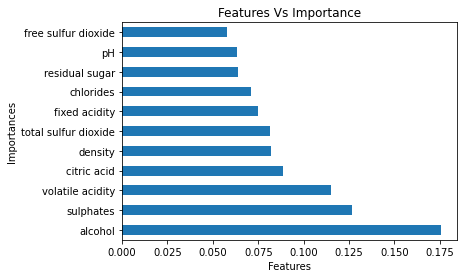

In [19]:
imp.plot.barh()
plt.xlabel("Features")
plt.ylabel("Importances")
plt.title("Features Vs Importance");

### Insights from the data

So we can see from our model that the PH really contributed to the quality of the wine inversely
(i.e as the PH increases the quality decreases)

Like wise the alcohol contributed immensly to the quality of the wine. People love the smell of ethanol lol.


So we can postulate that inorder for you to have good quality of wine, always consider the volume pf alcohol, sulphate etc.